<a href="https://colab.research.google.com/github/reginaxy/Hotel_Analysis/blob/main/Text_Preprocessing_(Remove_Empty_Reviews_%26_Noise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries, Packages and Data**

**Import Libraries & Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud

import nltk, string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Mount to GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Dataset**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_EUROPE.csv'
df = pd.read_csv(path)
df

,Hotel_Country,Hotel_City,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,...,Tags,days_since_review,lat,lng,Year,Month,Trip_type,Trip_visitor_type,Trip_days_of_stay,Reviewer_Score_round
0,Netherlands,Amsterdam,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-03-08,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,3,Leisure,Couple,4 or more nights,3.0
1,Netherlands,Amsterdam,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-03-08,7.7,Hotel Arena,Ireland,No Negative,0,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,3,Leisure,Couple,4 or more nights,8.0
2,Netherlands,Amsterdam,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,...,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,2017,7,Leisure,Family,3 nights,7.0
3,Netherlands,Amsterdam,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,2017,7,Leisure,Solo,3 nights,4.0
4,Netherlands,Amsterdam,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,...,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,2017,7,Leisure,Couple,2 nights,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515207,Austria,Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,...,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,2015,8,Leisure,Family,4 or more nights,7.0
515208,Austria,Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,...,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,2015,8,Leisure,Family,2 nights,6.0
515209,Austria,Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,...,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,2015,8,Leisure,Family,4 or more nights,2.0
515210,Austria,Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,...,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,2015,8,Leisure,Group,3 nights,9.0


# **Working on Negative Reviews**

**Keep only rows that are required for Negative Reviews**

In [ ]:
df_neg = df[['Review_Date','Hotel_Country', 'Hotel_Name','Reviewer_Nationality','Negative_Review']]

**Overview of Data**

In [ ]:
df_neg.describe()

,Review_Date,Hotel_Country,Hotel_Name,Reviewer_Nationality,Negative_Review
count,515212,515212,515212,515212,515212
unique,731,6,1492,227,330011
top,2017-02-08,UK,Britannia International Hotel Canary Wharf,United Kingdom,No Negative
freq,2584,262298,4789,245110,127757


**Describe Negative Reviews column**

In [ ]:
df_neg['Negative_Review'].describe()

count          515212
unique         330011
top       No Negative
freq           127757
Name: Negative_Review, dtype: object

**Observation:**

The top reviews are 'No Negative', however, this means that the reviewer did not provide us a negative review. It won't be useful for us to analyze the negative reviews keywords. 

We will remove columns containing 'No Negative', 'none', 'no', 'NA', etc., as this words indicate that the reviewer did not provide a negative review.

**Discard unwanted reviews & tag the remaining reviews sentiments as 'Negative'**

In [ ]:
# list of words to be discarded
discard = ["No Negative", "no negative", "Nothing", "nothing", "N A", "NA", "na","n a", "N a", "Na", "No", "no" "None", "none"]

# drop rows that contain the partial strings in the reviews column
df_neg_new = df_neg[~df_neg['Negative_Review'].str.contains('|'.join(discard))]

# create a new column with sentiments labelling
df_neg_new.insert(3, 'Sentiments', 'Negative')

# rename the column name
df_neg_updated = df_neg_new.rename({'Negative_Review': 'Review'}, axis='columns')

**Overview of updated Data**

In [ ]:
df_neg_updated.describe()

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review
count,244054,244054,244054,244054,244054,244054
unique,731,6,1492,1,216,220773
top,2017-02-08,UK,Britannia International Hotel Canary Wharf,Negative,United Kingdom,
freq,1265,126845,2766,244054,113498,849


**Observation:**

After removing columns containing 'No Negative', 'none', 'no', 'NA', etc (words indicate that the reviewer did not provide a negative review), we end up having 244, 054 reviews left (almost 50% of reviews were removed), compared to previously having 515, 212 rows.

**Samples of reviews tagged as 'Negative'**

In [ ]:
df_neg_updated.sample(10)

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review
59040,2016-10-17,UK,M by Montcalm Shoreditch London Tech City,Negative,United States of America,Had an issue with room key not working every ...
472490,2015-11-17,Italy,Hotel Milano Scala,Negative,Jersey,Bathroom not clean trolleys in corridor for m...
68455,2015-10-18,UK,Britannia International Hotel Canary Wharf,Negative,United Kingdom,Bed was very hard and uncomfortable
84450,2016-04-26,UK,Royal Garden Hotel,Negative,United Kingdom,We felt the sofa and desk should have been ro...
265056,2015-09-29,UK,Melia White House Hotel,Negative,United Kingdom,Only part that could be improved is perhaps t...
506939,2016-03-05,UK,Park Plaza Westminster Bridge London,Negative,United Kingdom,Screaming kids in the pool area which ruined ...
146929,2016-10-25,UK,The Marble Arch London,Negative,Kuwait,Room size
313414,2017-05-27,Spain,Eurostars Cristal Palace,Negative,United States of America,Slow response to requests on items such as ex...
423604,2017-05-13,Spain,NH Collection Barcelona Gran Hotel Calder n,Negative,United Kingdom,The swimming pool was closed we had no warnin...
319592,2016-03-05,Netherlands,Novotel Amsterdam City,Negative,Israel,The duvet sheets were not changed for 4 days ...


# **Working on Positive Reviews**

**Keep only rows that are required for Positive Reviews**

In [ ]:
df_pos = df[['Review_Date','Hotel_Country', 'Hotel_Name','Reviewer_Nationality','Positive_Review']]

**Overview of Data**

In [ ]:
df_pos.describe()

,Review_Date,Hotel_Country,Hotel_Name,Reviewer_Nationality,Positive_Review
count,515212,515212,515212,515212,515212
unique,731,6,1492,227,412601
top,2017-02-08,UK,Britannia International Hotel Canary Wharf,United Kingdom,No Positive
freq,2584,262298,4789,245110,35904


**Describe Positive Reviews column**

In [ ]:
df_pos['Positive_Review'].describe()

count          515212
unique         412601
top       No Positive
freq            35904
Name: Positive_Review, dtype: object

**Observation:**

1. The top reviews are 'No Positive', however, this means that the reviewer did not provide us a positive review. It won't be useful for us to analyze the positive reviews keywords. 

2. We will remove columns containing 'No Positive', 'none', 'no', 'NA', etc., as this words indicate that the reviewer did not provide a positive review.

**Discard unwanted reviews & tag the remaining reviews sentiments as 'Positive'**

In [ ]:
discard = ["No Positive", "no positive", "Nothing", "nothing", "N A", "NA", "na","n a", "N a", "Na", "No", "no" "None", "none"]

#drop rows that contain the partial strings in the reviews column
df_pos_new = df_pos[~df_pos['Positive_Review'].str.contains('|'.join(discard))]

# create a new column with sentiments labelling
df_pos_new.insert(3, 'Sentiments', 'Positive')

# rename the column name
df_pos_updated = df_pos_new.rename({'Positive_Review': 'Review'}, axis='columns')

**Overview of updated Data**

In [ ]:
df_pos_updated.describe()

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review
count,352421,352421,352421,352421,352421,352421
unique,731,6,1492,1,221,291701
top,2017-02-08,UK,Strand Palace Hotel,Positive,United Kingdom,Location
freq,1754,181654,3050,352421,168748,9207


**Observation:**

1. After removing columns containing 'No Positive', 'none', 'no', 'NA', etc (words indicate that the reviewer did not provide a positive review), we end up having 352,421 reviews left (almost 30% of reviews were removed), compared to previously having 515, 212 rows. 

2. 'Location' was identified as the top appearing token, meaning that it was one of the most mentioned word in the positive reviews. 

**Samples of reviews tagged as 'Positive'**

In [ ]:
df_pos_updated.sample(10)

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review
279504,2017-11-03,Spain,Gran Hotel Torre Catalunya,Positive,United Kingdom,Excellent bed
196938,2016-04-12,UK,Washington Mayfair Hotel,Positive,United Kingdom,The location was good
368340,2016-07-08,Netherlands,Best Western Blue Tower Hotel,Positive,Venezuela,Excellent staff and breakfast
414475,2016-06-23,Spain,Olivia Plaza Hotel,Positive,Brazil,the attention of the staff
227232,2016-07-31,UK,Best Western Palm Hotel,Positive,United Kingdom,Car parking and rooms
311949,2016-09-06,Netherlands,Best Western Premier Hotel Couture,Positive,New Zealand,Beautiful big bathroom
375614,2016-04-02,UK,Hallmark Hotel London Chigwell Prince Regent,Positive,United Kingdom,The room was nice but 2 lamps didn t work pai...
358962,2016-08-25,Netherlands,Park Plaza Vondelpark Amsterdam,Positive,United Kingdom,Comfortable rooms free wifi nice toiletries
512627,2016-10-17,UK,Holiday Inn London Kensington,Positive,United Kingdom,good location handy for tube efficient room s...
294558,2016-08-18,UK,Holiday Inn London Regent s Park,Positive,United States of America,Great service great breakfast buffet kids eat...


# **Concatenate Positive & Negative Reviews**

**Concatenating negative and positive reviews into a single dataframe**

In [ ]:
frames = [df_neg_updated, df_pos_updated]

result = pd.concat(frames)

**Overview of concatenated dataset**

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596475 entries, 5 to 515211
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Review_Date           596475 non-null  object
 1   Hotel_Country         596475 non-null  object
 2   Hotel_Name            596475 non-null  object
 3   Sentiments            596475 non-null  object
 4   Reviewer_Nationality  596475 non-null  object
 5   Review                596475 non-null  object
dtypes: object(6)
memory usage: 31.9+ MB


**Observation:**

After concatenating both the negative and positive reviews into a single dataframe, we observe that there are 596, 475 total records in our new dataset.

# **Text Preprocessing**

We will perform the following to clean our textual reviews: -

**1. Lowercase**

**2. Remove punctuation**

**3. Remove words that contain numbers**

**4. Remove stopwords (e.g. and, the, or, I)**

**5. Extended stopwords list --> meaningless words (e.g. everything, anything, actually, really)**

**6. Lemmatization --> (e.g. running, runs, ran --> run (lemma/root word))**

In [ ]:
# Text-preprocessing

def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    new_words =('anything','everything', 'bit', 'much', 'really', 'actually', 'would', 'could')
    for i in new_words:
      stop.append(i)
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t) for t in text]
    
    # join all
    text = " ".join(text)
    return(text)

# clean text data
result["cleaned_Reviews"] = result["Review"].apply(lambda x: clean_text(x))

**Comparison of reviews before and after text cleaning**

In [ ]:
pd.set_option('display.max_colwidth', None)
result[['Review', 'cleaned_Reviews']].sample(10)

,Review,cleaned_Reviews
121737,I like everything,like
200592,I didn t appreciate having to pay three pounds for a pair of bedroom slippers for a hotel like this,appreciate pay three pound pair bedroom slipper hotel like
134449,Good location,good location
198048,Hadn t realised how much taxis cost to go over the other side of the river,realised taxi cost go side river
187201,The beds were stylish and comfy Good selection of teas and coffee Curtains blocked light out in morning,bed stylish comfy good selection tea coffee curtain blocked light morning
258379,Great location for British Museum and shopping Beautiful hot buffet breakfast,great location british museum shopping beautiful hot buffet breakfast
106225,The rooms were big and comfortable staff were nice and helpful afternoon tea with its assortment of baked items and finger sandwiches was a very welcome touch especially for the kids,room big comfortable staff nice helpful afternoon tea assortment baked item finger sandwich welcome touch especially kid
431675,Bedroom facing inwards to atrium Making room dark and hard to see unless with lights all on even so pretty dark Think the large mirror along the wall didn t help either,bedroom facing inwards atrium making room dark hard see unless light even pretty dark think large mirror along wall help either
316731,The bed was very uncomfortable as was the bed settee and the swimming pool was lovely but the changing and steps down to pool were not good at all They were slippy and not disabled friendly,bed uncomfortable bed settee swimming pool lovely changing step pool good slippy disabled friendly
249340,Excellent location clean comfortable beds and room friendly staff,excellent location clean comfortable bed room friendly staff


**Check for empty rows after text cleaning**

In [ ]:
# Check for empty lines
(result['cleaned_Reviews'] == '').value_counts()

False    589775
True       3884
Name: cleaned_Reviews, dtype: int64

**Remove empty rows that have no tokens left after text cleaning**

In [ ]:
# Remove empty lines

result_empty = result[result['cleaned_Reviews']==''].index

# Delete these row indexes from dataFrame
result.drop(result_empty , inplace=True)

**Sentiment Counts**

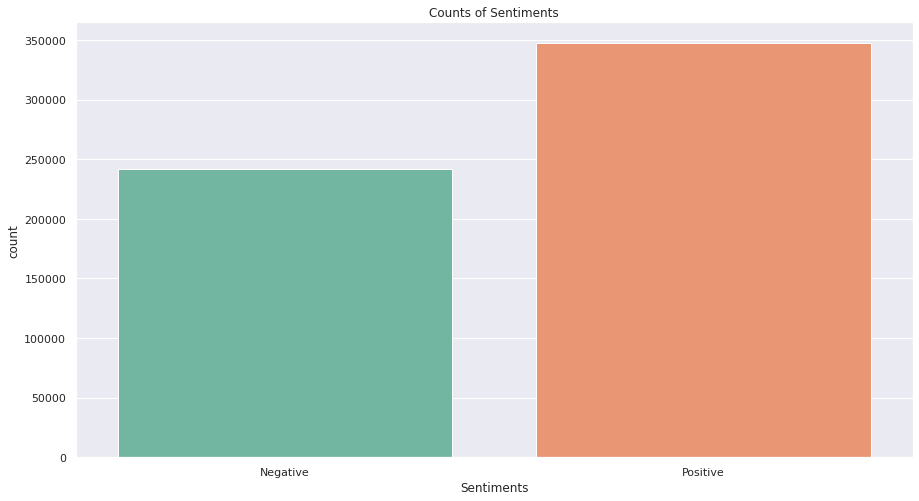

In [ ]:
# Visualise sentiment counts

ax = sns.countplot(x="Sentiments", data=result, palette = 'Set2')
plt.title('Counts of Sentiments')
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
result.Sentiments.value_counts()

Positive    347390
Negative    241427
Name: Sentiments, dtype: int64

**Observation:**

We have a quite balanced dataset in terms of the sentiments distribution (7:10 ratio). 

Hence, we would not be performing any re-sampling techniques to the dataset.

**Hotel Reviews Sentiment Distribution by Hotel Country**

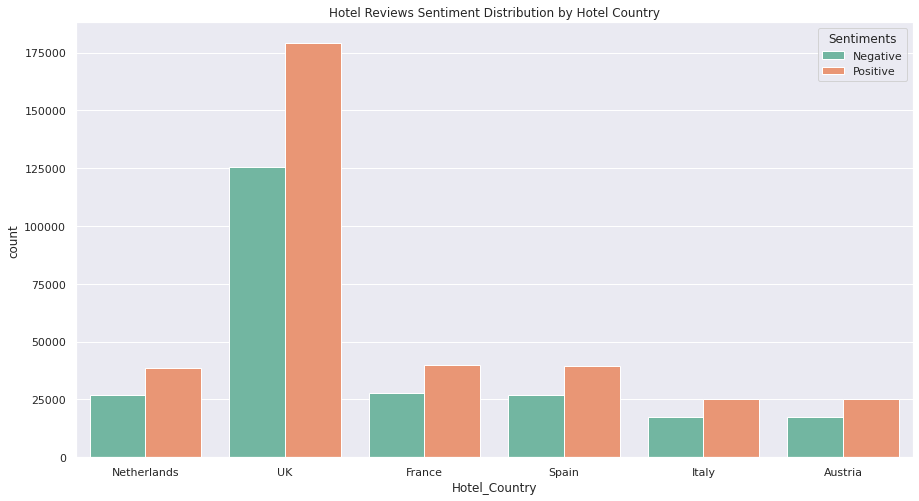

In [ ]:
ax = sns.countplot(x="Hotel_Country", hue="Sentiments", data=result, palette = 'Set2')
plt.title('Hotel Reviews Sentiment Distribution by Hotel Country')
sns.set(rc = {'figure.figsize':(15,8)})

**Observation:**

The positive sentiments counts account for a higher proportion in all 6 countries, and the sentiments distributions across all countries are equally as balanced.

**Word Cloud**

In [ ]:
# Function to draw Word Cloud

def wordcloud_draw(data, color = 'white'):
    words = ''.join(list(data.values))
    
    wordcloud = WordCloud(
                      background_color=color,
                      max_words=5000,
                     ).generate(words)
    plt.figure(1,figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

**Word Cloud of Positive Reviews words**

Positive words are as follows: -


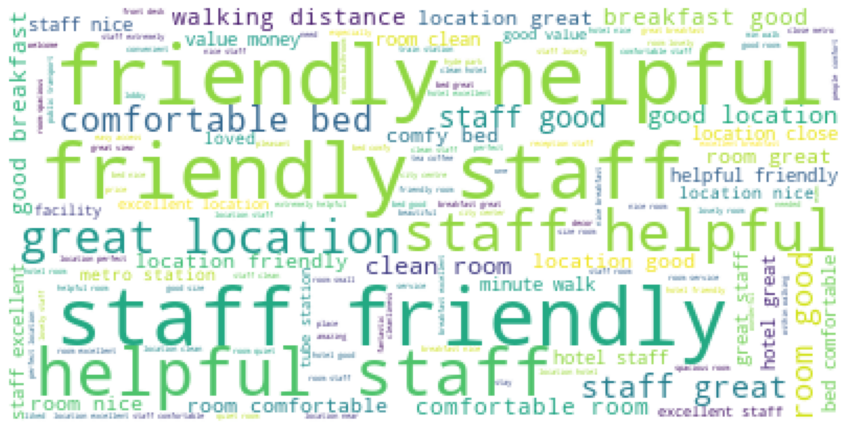

In [ ]:
# Positive Reviews Word Cloud

positivedata = result[result['Sentiments'] == "Positive"]
positivedata =positivedata['cleaned_Reviews']

print("Positive words are as follows: -")
wordcloud_draw(positivedata,'white')

**Word Cloud of Negative Reviews words**

Negative words are as follows: -


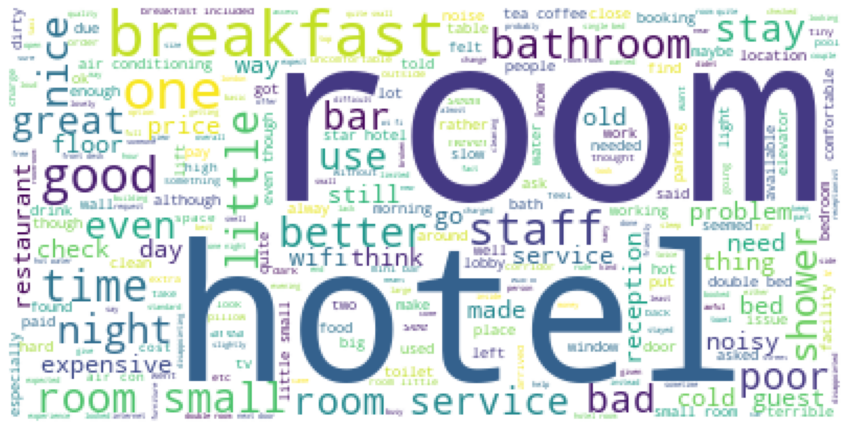

In [ ]:
# Negative Reviews Word Cloud

negdata = result[result['Sentiments'] == "Negative"]
negdata= negdata['cleaned_Reviews']

print("Negative words are as follows: -")
wordcloud_draw(negdata)

**Frequently occuring tokens in Positive Reviews**

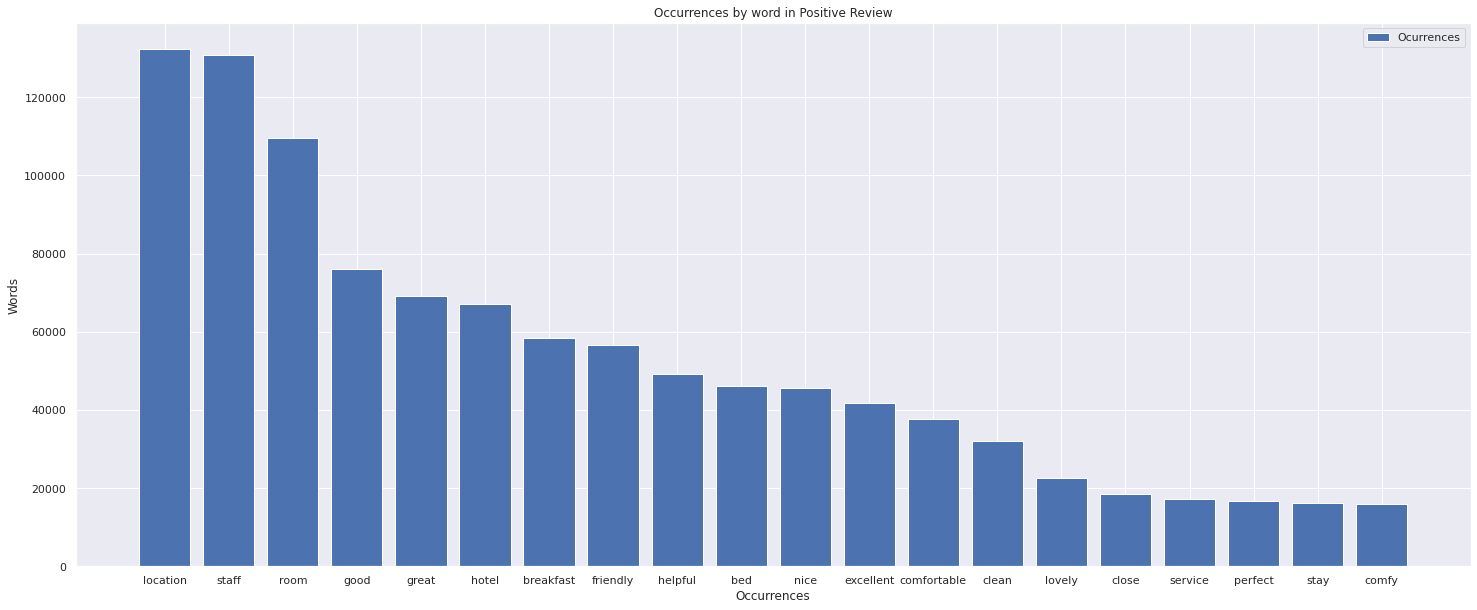

In [ ]:
# Plot frequently occuring tokens in Positive Reviews

from collections import Counter

positivedata = result[result['Sentiments'] == "Positive"]

review = positivedata.cleaned_Reviews.values
all_text2 = ' '.join(review)

# create a list of words
word_list = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(word_list)

total_words = len(word_list)
sorted_words = count_words.most_common(total_words)[0:20]

n_groups = len(sorted_words)

vals_words = [x[1] for x in sorted_words]
legends_words = [x[0] for x in sorted_words]

fig, ax = plt.subplots(figsize=(25,10))

index = np.arange(n_groups)

rects1 = plt.bar(index, vals_words,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word in Positive Review')
plt.xticks(index, legends_words)
plt.legend()

plt.show()

**Frequently occuring tokens in Negative Reviews**

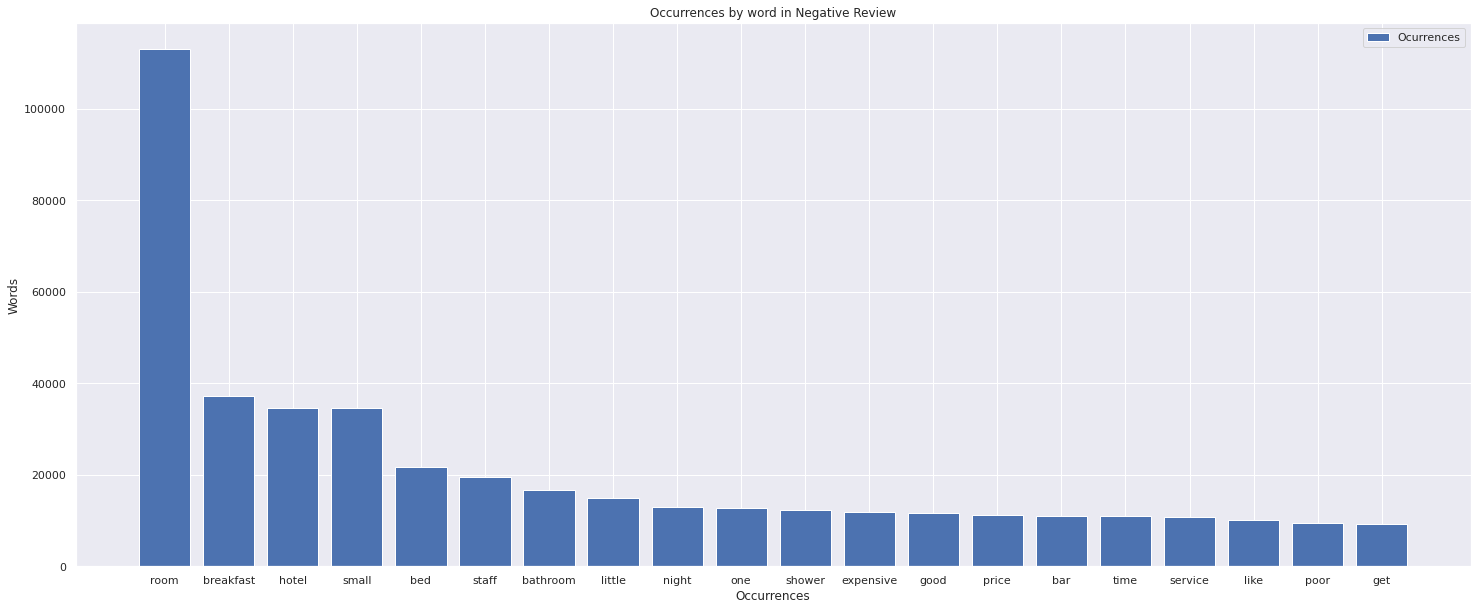

In [ ]:
# Plot frequently occuring tokens in Negative Reviews

from collections import Counter

negativedata = result[result['Sentiments'] == "Negative"]

review = negativedata.cleaned_Reviews.values
all_text2 = ' '.join(review)

# create a list of words
word_list = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(word_list)

total_words = len(word_list)
sorted_words = count_words.most_common(total_words)[0:20]

n_groups = len(sorted_words)

vals_words = [x[1] for x in sorted_words]
legends_words = [x[0] for x in sorted_words]

fig, ax = plt.subplots(figsize=(25,10))

index = np.arange(n_groups)

rects1 = plt.bar(index, vals_words,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word in Negative Review')
plt.xticks(index, legends_words)
plt.legend()

plt.show()

# **Further text cleaning (checking reviews length)**

**Check length of cleaned reviews**

In [ ]:
result['num_text'] = result['cleaned_Reviews'].apply(lambda x:len(str(x).split())) 
result.num_text.describe()

count    588817.000000
mean          7.935849
std           7.430510
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max         179.000000
Name: num_text, dtype: float64

**Observation:**
1. 25% of reviews have a length of 3 tokens, while 50% have a length of 6 tokens, and 75% have 10 tokens.
3. The longest review has a length of 179 tokens.
4. The mean (average) length of review is 8.

**Reviews with length less than or equal to 3**

In [ ]:
# Check for reviews with length < 3
(result['num_text'] < 3).value_counts()

False    475834
True     112983
Name: num_text, dtype: int64

**Reviews with length less than or equal to 10**

In [ ]:
# Check for reviews with length <= 10
(result['num_text'] <= 10).value_counts()

True     447090
False    141727
Name: num_text, dtype: int64

**Reviews with length more than 40**

In [ ]:
# Check for reviews with length > 40 
(result['num_text'] > 40).value_counts()

False    584979
True       3838
Name: num_text, dtype: int64

**Observation:**

1. Around 20% of reviews have length lesser than 3 tokens.
2. Around 76% of reviews have length lesser than or equals to 10 tokens.
3. Less than 0.5% of reviews have length more than or equals to 40 tokens.

**Plot length of cleaned reviews tokens**

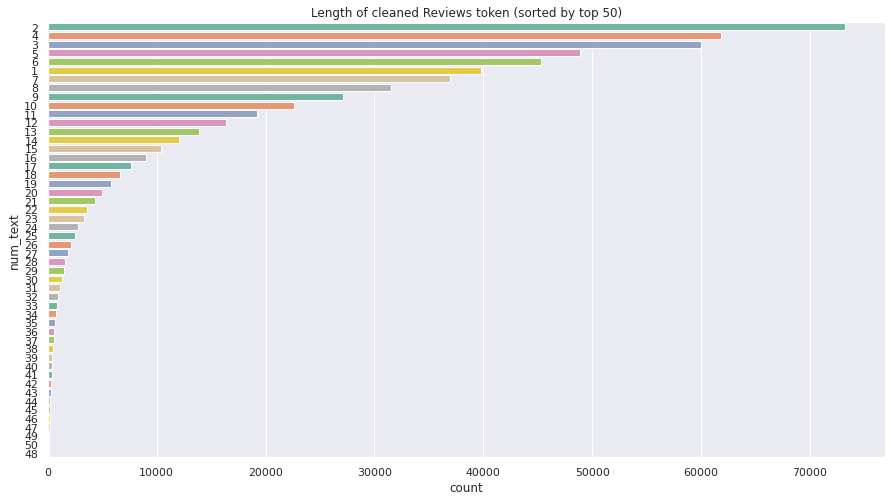

In [ ]:
# Plot length of cleaned reviews tokens

ax = sns.countplot(y='num_text', data=result, palette = 'Set2',order=pd.value_counts(result['num_text']).iloc[:50].index)
plt.title('Length of cleaned Reviews token (sorted by top 50)')
sns.set(rc = {'figure.figsize':(30,15)})

**Observation:** 
1. There are the most number of cleaned reviews that have 2 number of tokens. 
2. As the number of tokens increases, the number of cleaned reviews decreases.
3. Number of cleaned reviews having tokens > 40 onwards contributes to a relatively smaller proportion of the total dataframe.

Hence, we will be keeping only reviews with length between and equals to 2 to 40 tokens.

**Keep only reviews with length >= 2 & <= 40**

In [ ]:
# Keep only reviews with length >= 2 & <= 40
result_new = result[(result.num_text >= 2) & (result.num_text <= 40)]
result_new = result_new.drop(['num_text'], axis=1)

**Describe data after keeping only reviews with length >= 2 & <= 40**

In [ ]:
# Check the updated length of cleaned reviews tokens
result_new['num_text'].describe()

count    545181.000000
mean          8.135199
std           6.456211
min           2.000000
25%           4.000000
50%           6.000000
75%          11.000000
max          40.000000
Name: num_text, dtype: float64

**Overview of new Data**

In [ ]:
result_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545181 entries, 5 to 515211
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Review_Date           545181 non-null  object
 1   Hotel_Country         545181 non-null  object
 2   Hotel_Name            545181 non-null  object
 3   Sentiments            545181 non-null  object
 4   Reviewer_Nationality  545181 non-null  object
 5   Review                545181 non-null  object
 6   cleaned_Reviews       545181 non-null  object
dtypes: object(7)
memory usage: 33.3+ MB


**Observation:**

We have 545, 181 rows left after removing reviews with length < 2 & > 40.

**Export dataset as CSV file**

In [ ]:
# Export new dataframe
# for sentiment analysis
# for topic modelling 

output_loc = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_SENTIMENTS_40tokens.csv'
result_new.to_csv(output_loc, index = False)